In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# 로아 내 기본변수
min_s_rate = 3 # 최소확률
max_s_rate = 6 # 최대확률

gahomax = 6 # 가호 최대 개수

In [3]:
# 로아 내 강화재료 가격
stone_gold = 1.9 # 파괴수호석 (1개당)
debri_gold = 645/1500 # 파편 (1개당)
dolpa_gold = 29 # 돌파석 (1개당)
oreha_gold = 14 # 오레하 (1개당)

# 로아 내 추가재료 가격 (추후 반영)
gahogold = 340
chukgold = 180
eungold = 72

In [4]:
# 재련당 재료 투하
stones = 1300
debris = 1054
dolpa = 32
oreha = 20
gold = 730 # 재련 당 골드

In [5]:
# 로아 내 기본상수
k_rate = .465
step_s_rate = (max_s_rate - min_s_rate) / 10

chukmax = gahomax * 3
eunmax = gahomax * 6

gaho_rate, chuk_rate, eun_rate = min_s_rate / 3 / gahomax, min_s_rate / 3 / chukmax, min_s_rate / 3 / eunmax

spending = stone_gold*stones + debri_gold*debris + dolpa_gold*dolpa + oreha_gold*oreha + gold # 강화당 소모 골드
spending_full = spending + gahogold*gahomax + chukgold*chukmax + eungold*eunmax # 강화당 소모 골드(풀숨)

In [6]:
s_rate = np.concatenate((np.arange(min_s_rate, max_s_rate, step_s_rate), np.ones(240) * max_s_rate)) / 100 # 각 시도별 성공확률
s_rate_full = s_rate + (max_s_rate - min_s_rate) / 100  # 각 시도별 성공확률(풀숨)

k = k_rate * np.concatenate(([0], s_rate[:-1])) # 각 시도별 장인의 기운 누적량
k_full = k_rate * np.concatenate(([0], s_rate_full[:-1])) # 각 시도별 장인의 기운 누적량(풀숨)

In [7]:
s_rate_mat = np.diag(s_rate)

for i in range(s_rate_mat.shape[0]):
    for j in range(i):
        s_rate_mat[i,j] = s_rate_mat[j,j]

all_success = 1 - (1 - s_rate_mat).prod(axis = 1) # i+1 회 이내에 강화성공확률

In [8]:
s_rate_full_mat = np.diag(s_rate_full)

for i in range(s_rate_full_mat.shape[0]):
    for j in range(i):
        s_rate_full_mat[i,j] = s_rate_full_mat[j,j]

all_success_full = 1 - (1 - s_rate_full_mat).prod(axis = 1) # i+1 회 이내에 강화성공확률(풀숨)

In [23]:
k_rate_mat = np.diag(k)
for i in range(k_rate_mat.shape[0]):
    for j in range(i):
        k_rate_mat[i,j] = k[j]
nth_kiwoon = k_rate_mat.sum(axis = 1) # i+1 회시에 장인의 기운 누적량

In [10]:
k_rate_full_mat = np.diag(k_full)
for i in range(k_rate_full_mat.shape[0]):
    for j in range(i):
        k_rate_full_mat[i,j] = k_full[j]
nth_kiwoon_full = k_rate_full_mat.sum(axis = 1) # i+1 회시에 장인의 기운 누적량(풀숨)

In [11]:
ki100 = (nth_kiwoon < 1).sum() + 1 # 장기백 달성 강화 시도 횟수
ki100_full = (nth_kiwoon_full < 1).sum() + 1 # 장기백 달성 강화 시도 횟수(풀숨)

In [12]:
# 장기백 사이즈로 결과값 재조정
all_success = all_success[:ki100]
nth_kiwoon = nth_kiwoon[:ki100]
s_rate_mat = s_rate_mat[:ki100, :ki100]

all_success[-1] = 1 # 마지막 재련은 강화확률 1

In [13]:
# 장기백 사이즈로 결과값 재조정(풀숨)
all_success_full = all_success_full[:ki100_full]
nth_kiwoon_full = nth_kiwoon_full[:ki100_full]
s_rate_full_mat = s_rate_full_mat[:ki100_full, :ki100_full]

all_success_full[-1] = 1 # 마지막 재련은 강화확률 1

In [14]:
meanmat = 1 - s_rate_mat
meanmat[np.diag_indices(meanmat.shape[0])] = 1 - meanmat[np.diag_indices(meanmat.shape[0])]
meanmat[-1, -1] = 1

nth_success = meanmat.prod(1) # 정확히 i+1 회에 강화성공할 확률
mean_times = (nth_success * np.arange(1, 1+len(nth_success))) # 각 강화횟수별 기대값

In [15]:
meanmat_full = 1 - s_rate_full_mat
meanmat_full[np.diag_indices(meanmat_full.shape[0])] = 1 - meanmat_full[np.diag_indices(meanmat_full.shape[0])]
meanmat_full[-1, -1] = 1

nth_success_full = meanmat_full.prod(1) # 정확히 i+1 회에 강화성공할 확률(풀숨)
mean_times_full = (nth_success_full * np.arange(1, 1+len(nth_success_full))) # 각 강화횟수별 기대값(풀숨)

Text(0.5, 0, "Achieved Rate of 'ki100' : 10.30217%\n'ki100' : 27")

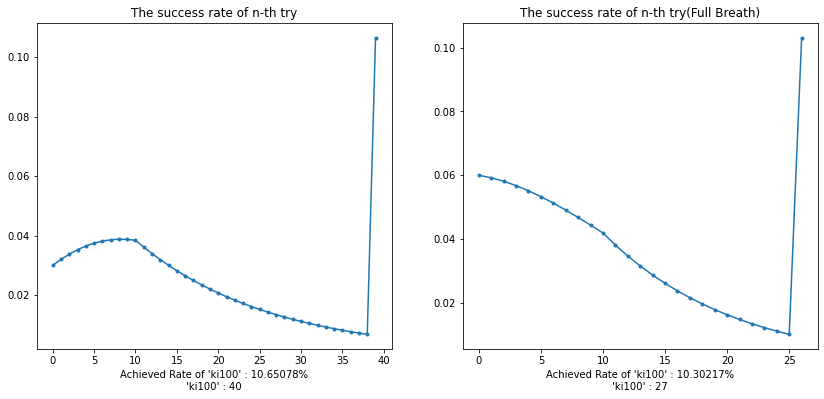

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

ax[0].plot(nth_success, '.-')
ax[0].set_title('The success rate of n-th try')
ax[0].set_xlabel('Achieved Rate of \'ki100\' : {:.5f}%\n\'ki100\' : {}'.format(nth_success[-1]*100, ki100))

ax[1].plot(nth_success_full, '.-')
ax[1].set_title('The success rate of n-th try(Full Breath)')
ax[1].set_xlabel('Achieved Rate of \'ki100\' : {:.5f}%\n\'ki100\' : {}'.format(nth_success_full[-1]*100, ki100_full))

Text(0.5, 0, 'Mean Smithing Times : 11.585660642546536')

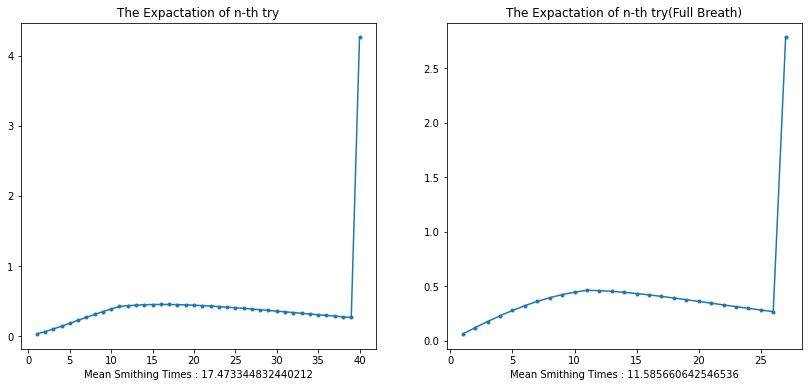

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

ax[0].plot(np.arange(1, len(mean_times)+1), mean_times, '.-')
ax[0].set_title('The Expactation of n-th try')
ax[0].set_xlabel('Mean Smithing Times : {}'.format(mean_times.sum())) # 평균 기대 횟수

ax[1].plot(np.arange(1, len(mean_times_full)+1), mean_times_full, '.-')
ax[1].set_title('The Expactation of n-th try(Full Breath)')
ax[1].set_xlabel('Mean Smithing Times : {}'.format(mean_times_full.sum())) # 평균 기대 횟수

Text(0.5, 1.0, 'Cumulative Success')

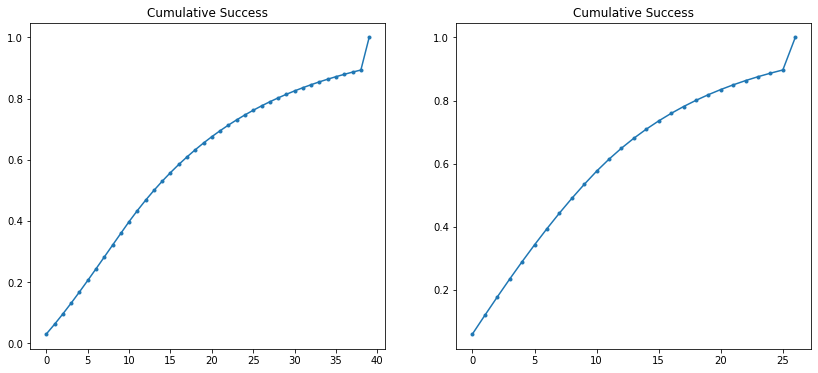

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

ax[0].plot(all_success, '.-')
ax[0].set_title('Cumulative Success')

ax[1].plot(all_success_full, '.-')
ax[1].set_title('Cumulative Success')

In [19]:
print('골드 소모 기대값 : {}'.format(mean_times.sum()*spending))
print('장기백시 골드 소모 : {}'.format(ki100*spending))
print()
print('골드 소모 기대값(풀숨) : {}'.format(mean_times_full.sum()*spending_full))
print('장기백시 골드 소모(풀숨) : {}'.format(ki100_full*spending_full))

골드 소모 기대값 : 84941.773366355
장기백시 골드 소모 : 194448.8

골드 소모 기대값(풀숨) : 147522.7658068864
장기백시 골드 소모(풀숨) : 343796.94
